# Make a botplot of the data found in Supplemental Material 1 (mbio.01672-21-sd001.xlsx) from [Ortiz et al., 2021](https://journals.asm.org/doi/10.1128/mbio.01672-21)

## Load dependencies and data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('germination_data.csv')
data

,PubChem_CID,Yeast_Inhibition_Percent,Cell_Viability_Percent,NanoLuc_Signal_Percent_Control
0,17520,101.5,3.3,93.6
1,27144,100.0,31.7,106.3
2,27297,101.8,4.7,110.4
3,66123,79.5,67.9,95.9
4,76937,22.1,59.9,99.4
...,...,...,...,...
233,91624614,-0.5,96.6,97.0
234,91626508,53.9,98.3,93.3
235,91628556,83.1,88.7,88.0
236,91629266,31.5,103.1,99.4


## Make Boxplot then save it to your computer as a PNG

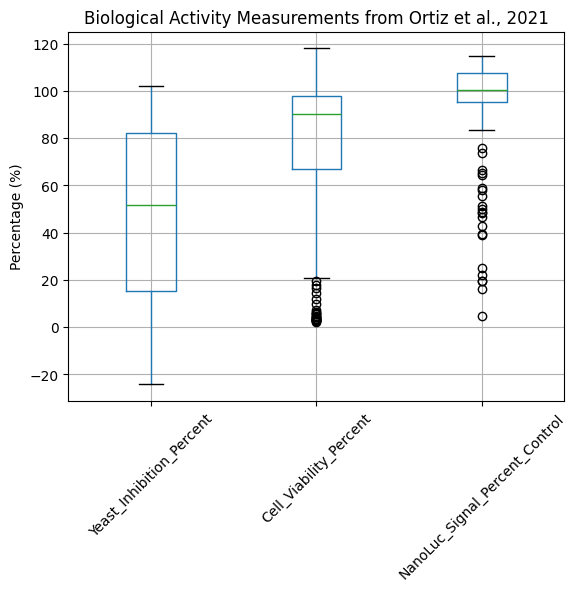

In [13]:
plt.clf()
data.boxplot(column=['Yeast_Inhibition_Percent', 'Cell_Viability_Percent', 'NanoLuc_Signal_Percent_Control'], rot=45)
plt.title('Biological Activity Measurements from Ortiz et al., 2021')
plt.ylabel('Percentage (%)')
plt.show() 

In [16]:
plt.clf()
data.boxplot(column=['Yeast_Inhibition_Percent', 'Cell_Viability_Percent', 'NanoLuc_Signal_Percent_Control'], rot=45)
plt.title('Biological Activity Measurements from Ortiz et al., 2021')
plt.ylabel('Percentage (%)')
plt.savefig('ortiz_boxplot.png', bbox_inches='tight', dpi=300) 

## Add each data point to the box plot

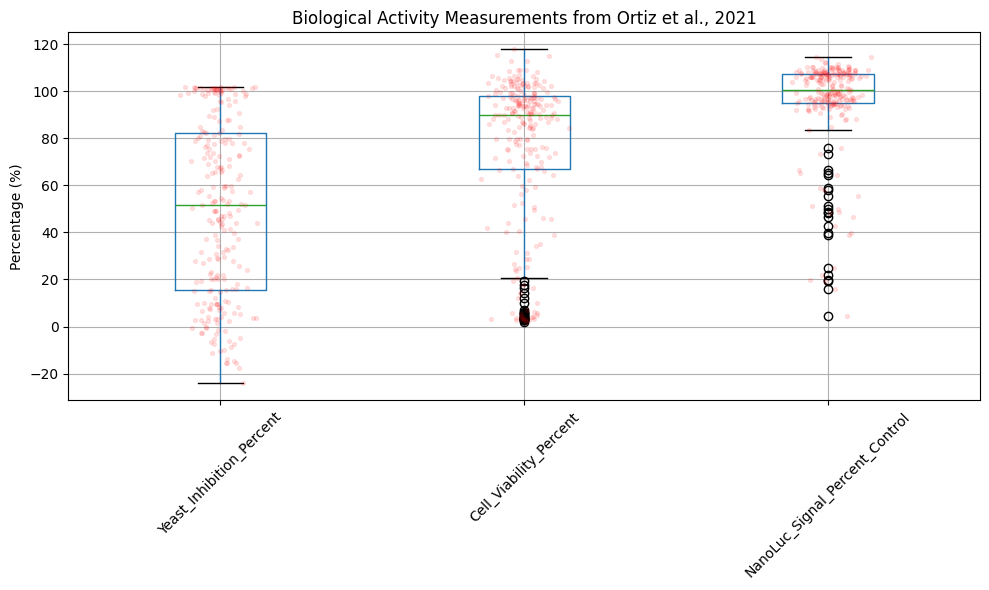

In [27]:
import numpy as np

# Create the "canvas" (fig) and axes (ax - plotting area) of the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create boxplot using pandas
columns = ['Yeast_Inhibition_Percent', 'Cell_Viability_Percent', 'NanoLuc_Signal_Percent_Control']
data[columns].boxplot(ax=ax, rot=45)

# Add individual data points over the boxes with jitter
for i, col in enumerate(columns): # enumerate() gives us both the index (i) and column name (col) for each column
    y_values = data[col].dropna()
    # Add jitter to x-axis positions to reduce overlap
        # np.random.normal(mean, std_dev, size) creates random numbers from a normal distribution
        # Here: mean=0, std_dev=0.05, size=number of data points - creates small random horizontal offsets
    jitter = np.random.normal(0, 0.05, len(y_values))
    # Position on x-axis (1-indexed for boxplot) + jitter
        # np.full(size, value) creates an array filled with the same value
        # Here: creates array of (i+1) values, then adds jitter for horizontal spread
    x_values = np.full(len(y_values), i + 1) + jitter  
    # ax.scatter(x, y, color, alpha, s, zorder) creates scatter plot points
    # x=horizontal positions, y=data values, color=red, alpha=transparency, s=size, zorder=layer order
        # Here: The boxplot has a default zorder, setting this to 3 ensures the scatter points appear above the boxplot elements
    ax.scatter(x_values, y_values, color='red', alpha=0.1, s=8, zorder=3)

# Customize the plot
ax.set_title('Biological Activity Measurements from Ortiz et al., 2021')
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('')

plt.tight_layout()
plt.show() 